In [1]:
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1008. InVitroWildfire EVProteomics V2/P1008.3. Analyses/P1008.3.1. Data Processing/Output')
cur_date = "071522"

library(readxl)
library(tidyverse)
library(imputeLCMD)
library(factoextra)
library(vegan)
library(preprocessCore)


#reading in files
identifiers_df = data.frame(read_excel("Input/Identifiers_030422.xlsx"))
set1_proteome_df = data.frame(read_excel("Input/PC927-Rager_LFQProteome_Results_RawValues_R ready.xlsx", sheet = 1))[,c(1,6,22:35)]
set2_proteome_df = data.frame(read_excel("Input/PC927-Rager_LFQProteome_Results_RawValues_R ready.xlsx", sheet = 2))[,c(1,6,22:35)]

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: tmvtnorm

Loading required package: mvtnorm

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: stats4

Loading required package: gmm

Loading required package: sandwich

Loading required package: norm

Loading required package: pcaMethods

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following o

In [2]:
head(identifiers_df)
head(set1_proteome_df)
head(set2_proteome_df)

,IDs_from_Core,Our_Analysis_ID,Set
,<chr>,<chr>,<chr>
1,Abundance..Pooled.1,CoCulture_PooledSample1,Set1
2,Abundance..Pooled.2,CoCulture_PooledSample2,Set1
3,Abundance..1..Vehicle,CoCulture_VehicleCT1,Set1
4,Abundance..3..Vehicle,CoCulture_VehicleCT2,Set1
5,Abundance..5..Vehicle,CoCulture_VehicleCT3,Set1
6,Abundance..7..Vehicle,CoCulture_VehicleCT4,Set1


,Accession,Number_of_UniquePeptides,Abundance..Pooled.1,Abundance..Pooled.2,Abundance..1..Vehicle,Abundance..3..Vehicle,Abundance..5..Vehicle,Abundance..7..Vehicle,Abundance..9..Vehicle,Abundance..11..Vehicle,Abundance..2..Wood.Smoke,Abundance..4..Wood.Smoke,Abundance..6..Wood.Smoke,Abundance..8..Wood.Smoke,Abundance..10..Wood.Smoke,Abundance..12..Wood.Smoke
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,P02769,99,4.89e+11,4.43e+11,6.26e+11,4.38e+11,4.74e+11,3.40e+11,4.94e+11,4.85e+11,4.54e+11,6.23e+11,7.37e+11,5.13e+11,3.96e+11,6.86e+11
2,P02751,201,2.73e+11,2.41e+11,2.24e+11,2.43e+11,3.24e+11,2.53e+11,2.45e+11,1.35e+11,1.68e+11,2.37e+11,2.98e+11,2.54e+11,1.97e+11,2.50e+11
3,P12763,34,2.63e+11,2.29e+11,3.10e+11,2.33e+11,2.70e+11,2.42e+11,2.71e+11,2.50e+11,2.67e+11,2.86e+11,3.27e+11,2.63e+11,2.52e+11,3.03e+11
4,Q2UVX4,162,5.65e+10,5.15e+10,6.76e+10,4.31e+10,4.09e+10,4.12e+10,4.92e+10,3.53e+10,4.76e+10,4.01e+10,3.68e+10,6.53e+10,4.45e+10,4.69e+10
5,P98160,210,2.27e+10,2.04e+10,3.01e+10,1.79e+10,1.40e+10,2.64e+10,2.81e+10,2.85e+10,1.97e+10,1.40e+10,1.30e+10,2.19e+10,2.46e+10,2.27e+10
6,P12111,201,2.15e+10,2.03e+10,1.55e+10,2.12e+10,2.29e+10,1.99e+10,2.00e+10,9.49e+09,1.67e+10,2.09e+10,2.67e+10,2.63e+10,2.06e+10,2.60e+10


,Accession,Number_of_UniquePeptides,Abundance..Pooled.1,Abundance..Pooled.2,Abundance..13..Vehicle,Abundance..15..Vehicle,Abundance..17..Vehicle,Abundance..19..Vehicle,Abundance..21..Vehicle,Abundance..23..Vehicle,Abundance..14..Wood.Smoke,Abundance..16..Wood.Smoke,Abundance..18..Wood.Smoke,Abundance..20..Wood.Smoke,Abundance..22..Wood.Smoke,Abundance..24..Wood.Smoke
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,P02751,193,197908273327,215449909749,290377149672,237808533258,300713328573,246820946145,304313034954,264966884310,243333335207,199860505414,279706283336,225170612912,229939459846,154501914723
2,P02769,97,342657042076,370488835120,308967859550,242917660277,278096520636,259674859546,291397652436,563821412595,281882492897,732144132018,248045691869,233383724786,349312465553,251094645011
3,P07996,34,64580519826,73778236233,181775619913,129485605438,169377550217,134685992120,114143664541,249366551496,132714564698,128084639698,112262919453,111419806864,73857936963,108923410421
4,Q2UVX4,160,41255020284,45525199756,55681501380,35618922477,44222632333,47245712210,44043324866,75943777589,53160804546,68298716794,48638631002,47654755526,35704911241,52145684636
5,P98160,207,16164372416,18035124503,20257643320,13577050138,17442737821,24582420164,20491703047,36081485773,20355674908,16277580495,15654918570,19579785521,16823558423,20030021253
6,P12763,32,180364995691,186934859645,159857253388,143580491033,158608208515,140452510019,145834623969,220324446614,137520441019,237042125375,156248949606,124984210103,171103871588,143324724008


In [3]:
# creating 1 proteome df
set1_proteome_df = set1_proteome_df %>%
    pivot_longer(cols = 3:16, names_to = "IDs_from_Core", values_to = "Value") %>%
    mutate(Set = c("Set1"))

set2_proteome_df = set2_proteome_df %>%
    pivot_longer(cols = 3:16, names_to = "IDs_from_Core", values_to = "Value") %>%
    mutate(Set = c("Set2"))

proteome_df = rbind(set1_proteome_df, set2_proteome_df) %>%
    rename(Protein = Accession)
head(proteome_df)

Protein,Number_of_UniquePeptides,IDs_from_Core,Value,Set
<chr>,<dbl>,<chr>,<dbl>,<chr>
P02769,99,Abundance..Pooled.1,4.89e+11,Set1
P02769,99,Abundance..Pooled.2,4.43e+11,Set1
P02769,99,Abundance..1..Vehicle,6.26e+11,Set1
P02769,99,Abundance..3..Vehicle,4.38e+11,Set1
P02769,99,Abundance..5..Vehicle,4.74e+11,Set1
P02769,99,Abundance..7..Vehicle,3.40e+11,Set1


In [4]:
#adding in our own ids
proteome_df = inner_join(identifiers_df, proteome_df) %>%
    select(-IDs_from_Core) %>%
    rename(ID = Our_Analysis_ID, Unique_Peptides = Number_of_UniquePeptides) %>%
    #creating a col that denotes the general treatment to remove proteins within those treatment groups
    mutate(Treatment = ifelse(grepl("CoCulture_PooledSample", ID), "CoCulture_PooledSample",
                             ifelse(grepl("CoCulture_Vehicle", ID), "CoCulture_Vehicle",
                                   ifelse(grepl("CoCulture_Exposed", ID), "CoCulture_Exposed",
                                         ifelse(grepl("TriCulture_PooledSample", ID), "TriCulture_PooledSample",
                                             ifelse(grepl("TriCulture_Vehicle", ID), "TriCulture_Vehicle",
                                                   ifelse(grepl("TriCulture_Exposed", ID), "TriCulture_Exposed",
                                         
                                         NA))))))) %>%
    # removing pooled samples and exposed since they're not needed for analysis
    filter(!grepl("PooledSample", Treatment)) %>%
    filter(!grepl("Exposed", Treatment))

head(proteome_df)

Joining, by = c("IDs_from_Core", "Set")


,ID,Set,Protein,Unique_Peptides,Value,Treatment
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,CoCulture_VehicleCT1,Set1,P02769,99,6.26e+11,CoCulture_Vehicle
2,CoCulture_VehicleCT1,Set1,P02751,201,2.24e+11,CoCulture_Vehicle
3,CoCulture_VehicleCT1,Set1,P12763,34,3.10e+11,CoCulture_Vehicle
4,CoCulture_VehicleCT1,Set1,Q2UVX4,162,6.76e+10,CoCulture_Vehicle
5,CoCulture_VehicleCT1,Set1,P98160,210,3.01e+10,CoCulture_Vehicle
6,CoCulture_VehicleCT1,Set1,P12111,201,1.55e+10,CoCulture_Vehicle


In [5]:
# intial number of proteins prior to filtering
length(unique(proteome_df$Protein))

[1] 2167

# 1. Peptide Normalization

Normalize to total amount of peptide per sample: sum the abundance values for each sample, then calculate the median value across all of the summed abundance values, and calculate the ratio

In [6]:
# set 1 = coculture, set 2 = triculture
normalized_df = proteome_df %>%
    group_by(Set, ID) %>%
    #removing missing data
    drop_na() %>%
    mutate(Summed_Value = sum(Value)) %>%
    #calculating median across all samples but still within each set
    ungroup() %>%
    group_by(Set) %>%
    mutate(Median_of_Sum = median(Summed_Value), Norm_Factor = Summed_Value/ Median_of_Sum, 
           Norm_Value = Value/Norm_Factor) %>%
    select(-c("Summed_Value", "Median_of_Sum", "Norm_Factor"))
head(normalized_df)

ID,Set,Protein,Unique_Peptides,Value,Treatment,Norm_Value
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
CoCulture_VehicleCT1,Set1,P02769,99,6.26e+11,CoCulture_Vehicle,542807252302
CoCulture_VehicleCT1,Set1,P02751,201,2.24e+11,CoCulture_Vehicle,194231349066
CoCulture_VehicleCT1,Set1,P12763,34,3.10e+11,CoCulture_Vehicle,268802313440
CoCulture_VehicleCT1,Set1,Q2UVX4,162,6.76e+10,CoCulture_Vehicle,58616246415
CoCulture_VehicleCT1,Set1,P98160,210,3.01e+10,CoCulture_Vehicle,26099837531
CoCulture_VehicleCT1,Set1,P12111,201,1.55e+10,CoCulture_Vehicle,13440115672


# 2. Detection Filter - Round 1

Round 1 - Unable to replicate the 1% peptide/ 5% protein FDR, so we'll just retain proteins that were identified by at least 2 peptides.

In [7]:
# only keeping proteins > 2 unique proteins
detection_filter_1_df = proteome_df %>%
    filter(Unique_Peptides > 2)

detection_filter_1_df %>%
    group_by(Set) %>%
    summarize(`Remaining Proteins` = length(unique(Protein)))

Set,Remaining Proteins
<chr>,<int>
Set1,1024
Set2,1382


# 3. Detection Filter - Round 2

Round 2 - Filter rows based on valid values: 50 % valid in at least one treatment group (i.e. proteins with values observed in fewer than 50% of replicates (here, 3 reps) in at least 1 condition were eliminated from the dataset) 

In [8]:
protein_presence_df = detection_filter_1_df %>%
    # creating 2 count cols: 1st for non-missing data, 2nd for all data
    mutate(data_count = ifelse(is.na(Value), 0, 1), all_count = 1) %>%
    group_by(Set, Treatment, Protein) %>%
    summarize(Protein_Presence = sum(data_count)/ sum(all_count) * 100) %>%
    filter(Protein_Presence < 50) %>%
    arrange(Protein_Presence) 

head(protein_presence_df)

# getting the proteins in the entire set that will be removed
removed_proteins_df = protein_presence_df %>%
    ungroup() %>%
    select(-c("Treatment", "Protein_Presence")) %>% 
    unique()

# number of proteins removed from each set for the 2nd detection filter
removed_proteins_df %>%
    group_by(Set) %>%
    summarize(`Removed Proteins` = length(unique(Protein)))

`summarise()` has grouped output by 'Set', 'Treatment'. You can override using
the `.groups` argument.


Set,Treatment,Protein,Protein_Presence
<chr>,<chr>,<chr>,<dbl>
Set1,CoCulture_Vehicle,P11387,0.00000
Set1,CoCulture_Vehicle,P49736,0.00000
Set1,CoCulture_Vehicle,Q14566,0.00000
Set1,CoCulture_Vehicle,Q9NQ30,0.00000
Set1,CoCulture_Vehicle,Q9Y5B9,0.00000
Set1,CoCulture_Vehicle,O75533,16.66667


Set,Removed Proteins
<chr>,<int>
Set1,21
Set2,4


In [9]:
# removing those 25 proteins from the entire dataset (but within each set)
# finding proteins that exist only in the proteome_df but not the removed proteins_df
detection_filter_2_df = anti_join(detection_filter_1_df, removed_proteins_df)
head(detection_filter_2_df)

# number of proteins kept
detection_filter_2_df %>%
    group_by(Treatment) %>%
    summarize(`Kept Proteins` = length(unique(Protein)))

Joining, by = c("Set", "Protein")


,ID,Set,Protein,Unique_Peptides,Value,Treatment
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,CoCulture_VehicleCT1,Set1,P02769,99,6.26e+11,CoCulture_Vehicle
2,CoCulture_VehicleCT1,Set1,P02751,201,2.24e+11,CoCulture_Vehicle
3,CoCulture_VehicleCT1,Set1,P12763,34,3.10e+11,CoCulture_Vehicle
4,CoCulture_VehicleCT1,Set1,Q2UVX4,162,6.76e+10,CoCulture_Vehicle
5,CoCulture_VehicleCT1,Set1,P98160,210,3.01e+10,CoCulture_Vehicle
6,CoCulture_VehicleCT1,Set1,P12111,201,1.55e+10,CoCulture_Vehicle


Treatment,Kept Proteins
<chr>,<int>
CoCulture_Vehicle,1003
TriCulture_Vehicle,1378


# 4. Log2 Transformation

Did this step later in the imputation function. 

# 5. QRILC Imputation

QRILC replaces data with left-censored data from a Gaussian distribution. 

In [10]:
# adding in normalized values to the filtered df
# left join returns all the records from the first table along with matching records from the second
detection_filter_normalized_df = left_join(detection_filter_2_df, normalized_df) %>% 
                       select(-Unique_Peptides)

preimputed_df = detection_filter_normalized_df[, c(1,2,5,3,4,6)]
head(preimputed_df)

Joining, by = c("ID", "Set", "Protein", "Unique_Peptides", "Value",
"Treatment")


,ID,Set,Treatment,Protein,Value,Norm_Value
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,P02769,6.26e+11,542807252302
2,CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,P02751,2.24e+11,194231349066
3,CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,P12763,3.10e+11,268802313440
4,CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,Q2UVX4,6.76e+10,58616246415
5,CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,P98160,3.01e+10,26099837531
6,CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,P12111,1.55e+10,13440115672


In [11]:
# first splitting df to impute within set 
preimputed_df_split = preimputed_df %>%
    group_by(Set) %>%
    group_split()

coculture_vehicleCT_preimputed_df = preimputed_df_split[[1]] 
triculture_vehicleCT_preimputed_df = preimputed_df_split[[2]]

In [12]:
# QRILC
QRILC_imputation = function(dataset){
    # """
    # Creating a quantile normalization function to normalize each sample.
    # :param (input): exposed and unexposed (vehicle) dfs
    # :output: 1 quantile normalized df
    # """
    wider_dataset = dataset %>%
        select(-c("Set", "Value", "Treatment")) %>%
        pivot_wider(names_from = Protein, values_from = Norm_Value) 
    
    # normalizing data since that's what the QRILC function wants
    QRILC_prep = wider_dataset[,2:dim(wider_dataset)[2]] %>%
         mutate_all(., function(x) log2(x)) %>%
         as.matrix()

    imputed_QRILC_object = impute.QRILC(QRILC_prep, tune.sigma = 0.1)
    QRILC_log2_df = data.frame(imputed_QRILC_object[1]) 
    
    # converting back the original scale
    QRILC_df = QRILC_log2_df %>%
        mutate_all(., function(x) 2^x - 1)
    
    # adding a replicate col so values can be uniquely identified for pca later, also adding back in ID col
    QRILC_df = cbind(ID = wider_dataset$ID, QRILC_df)
            
    # adding back in Tx, and Set columns
    final_pivoted_column_number = dim(QRILC_df)[2] + 2
    imputed_dataset = data.frame(cbind(dataset[1:6,2:3], QRILC_df)) %>%
        pivot_longer(cols = 4:all_of(final_pivoted_column_number), names_to = "Protein", values_to = "Value")
    
   return(imputed_dataset)
}

# calling fn
coculture_vehicleCT_imputed_df = QRILC_imputation(coculture_vehicleCT_preimputed_df)
triculture_vehicleCT_imputed_df = QRILC_imputation(triculture_vehicleCT_preimputed_df)

In [13]:
 head(coculture_vehicleCT_imputed_df)

Set,Treatment,ID,Protein,Value
<chr>,<chr>,<chr>,<chr>,<dbl>
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,P02769,542807252301
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,P02751,194231349065
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,P12763,268802313439
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,Q2UVX4,58616246414
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,P98160,26099837530
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,P12111,13440115671


# 6. PCA

Using PCA to identify and remove outlier samples.

In [14]:
# prepping dfs for PCA
pca_prep_coculture_df = coculture_vehicleCT_imputed_df %>%
    select(-c("Set", "Treatment")) %>%
    pivot_wider(names_from = Protein, values_from = Value) %>%
    column_to_rownames(var = "ID")
pca_prep_triculture_df = triculture_vehicleCT_imputed_df %>%
    select(-c("Set", "Treatment")) %>%
    pivot_wider(names_from = Protein, values_from = Value) %>%
    column_to_rownames(var = "ID")

head(pca_prep_coculture_df)

,P02769,P02751,P12763,Q2UVX4,P98160,P12111,Q28085,Q0IIK2,P21333,O00468,⋯,Q93009,P12645,P61923,P06744,O75146,P50479,O14744,P27694,P05161,Q12907
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CoCulture_VehicleCT1,542807252301,194231349065,268802313439,58616246414,26099837530,13440115671,42314686760,49251520655,6650689496,23151683124,⋯,1313510,5381215,2549805,1192199.7,401236.9,3388079,2193276,1724513,1170779,4173816
CoCulture_VehicleCT2,429668665879,238377821481,228568034588,42280181505,17559518536,20796748211,45321215441,34334254122,12360331483,22464411982,⋯,2428480,6173277,8424817,815546.1,614091.4,9880515,6702611,3137389,1160705,2372010
CoCulture_VehicleCT3,456158636211,311804637410,259837197841,39360523672,13473039887,22038043816,40322883664,35799791702,3204658772,21460627821,⋯,1358984,6629245,2460438,815599.9,582124.0,2012606,1506386,1436622,4672530,2307717
CoCulture_VehicleCT4,380324423629,283006115230,270701501524,46086371333,29531072893,22260164794,52462398435,29307352643,7517000372,20134822426,⋯,1367153,12854581,2888433,2932209.7,402188.7,2413034,1592875,2626827,1484883,2156946
CoCulture_VehicleCT5,493999999999,244999999999,270999999999,49199999999,28099999999,19999999999,53599999999,44399999999,7459999999,22999999999,⋯,1004541,19809865,5318483,1185902.0,380874.3,3825004,2297235,1743060,1116256,2153545
CoCulture_VehicleCT6,535546862716,149069745291,276055083874,38978977842,31470279561,10479050983,38095601574,44610501553,11263047421,19655121971,⋯,2610449,25015342,8307907,2199324.3,322902.8,8202353,3335024,1718832,5046121,4778977


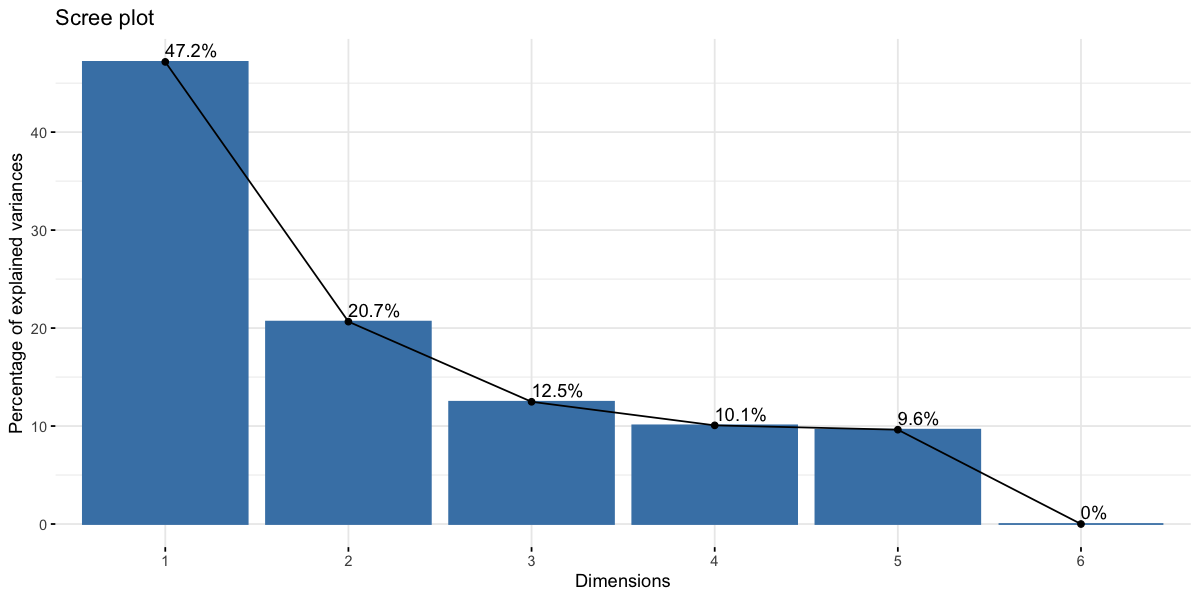

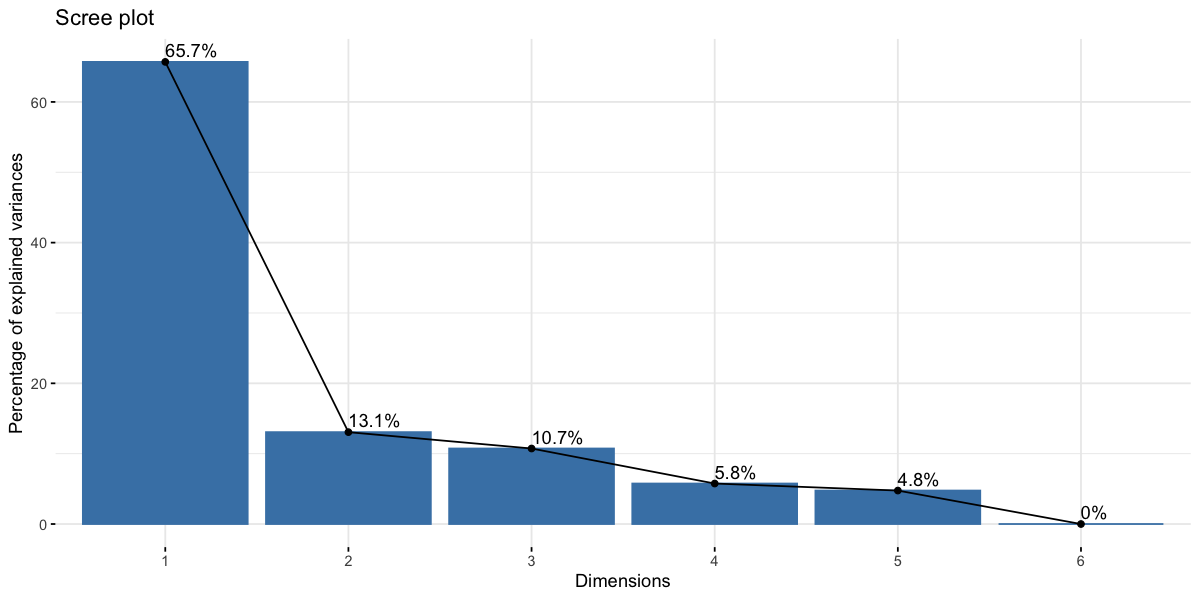

In [15]:
# running PCA
# unable to run pca on entire dataset, each treatment included different proteins creating missing data
# variables = replicates, individuals = proteins
pca_coculture = prcomp(pca_prep_coculture_df, scale = TRUE)
pca_triculture = prcomp(pca_prep_triculture_df, scale = TRUE)

# viewing scree plots to see how much of the variance was captured in first 2 eigenvectors
options(repr.plot.width=10, repr.plot.height=5) #changing size
fviz_eig(pca_coculture, addlabels = TRUE)
fviz_eig(pca_triculture, addlabels = TRUE)

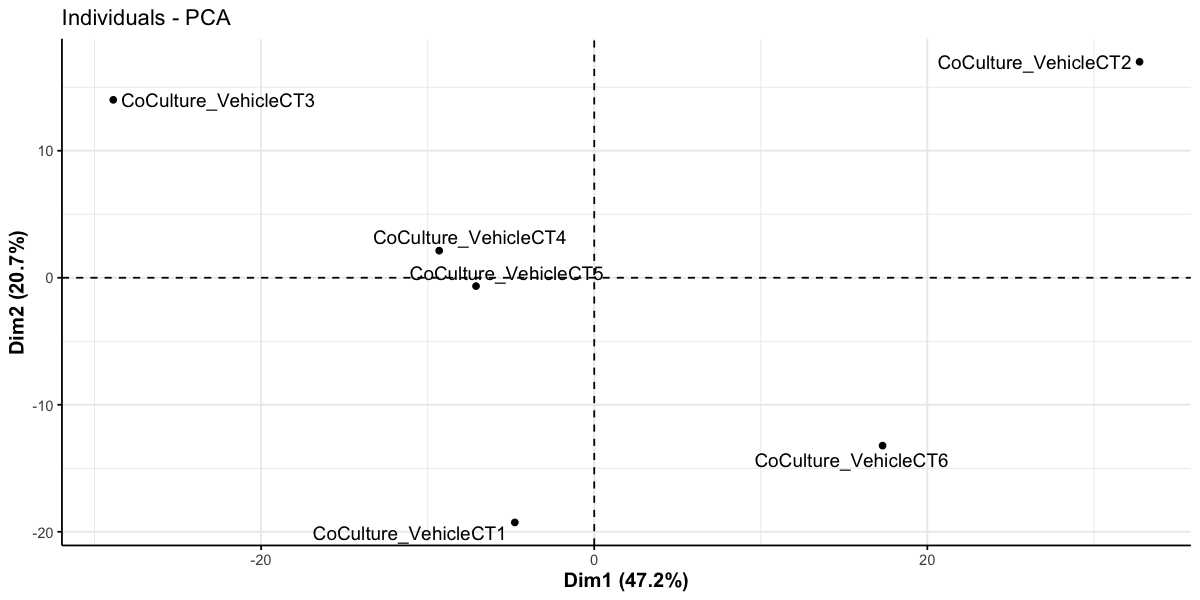

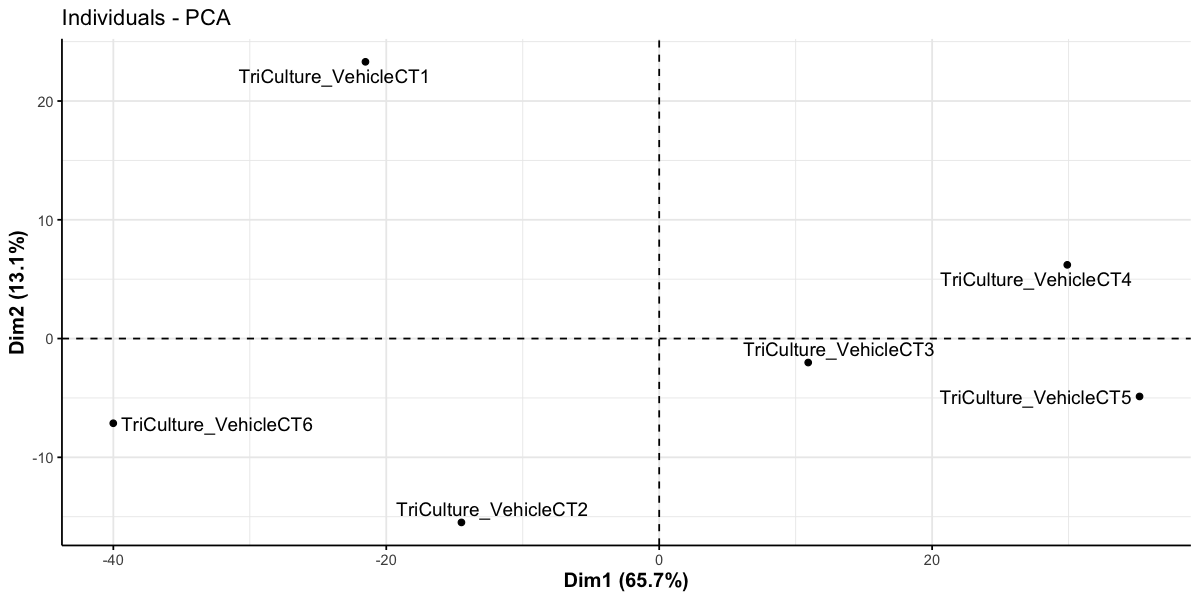

In [16]:
# visualizing all data to detect outliers
fviz_pca_ind(pca_coculture, 
             repel = TRUE) +
theme(axis.line = element_line(colour = "black"), #making x and y axes black
      legend.text = element_text(size = 8),
      axis.title = element_text(face = "bold", size = rel(1.1))) #changes axis titles

fviz_pca_ind(pca_triculture, 
             repel = TRUE) +
theme(axis.line = element_line(colour = "black"), #making x and y axes black
      legend.text = element_text(size = 8),
      axis.title = element_text(face = "bold", size = rel(1.1))) #changes axis titles

I'll use a formula to detect outliers rather than visual inspection, since there aren't any obvious outliers. 

The standard way to detect outliers in genetics is the criterion of being “more than 6 standard deviations away from the mean”. [source](https://privefl.github.io/blog/detecting-outlier-samples-in-pca/)

In [17]:
outlier_detection = function(pca_df){
    # """
    # Creating a scoring function for to detect PCA sample outliers. 
    # :param (input): PCA df (df)
    # :output: outlier names
    # """
    
    # getting scores
    scores = pca_df$x
    # identifying samples that are > 6 standard deviations away from the mean
    outlier_indices = apply(scores, 2, function(x) which( abs(x - mean(x)) > (6 * sd(x)) )) %>%
        Reduce(union, .)
    # getting sample names
    outliers = rownames(scores)[outlier_indices]
    
    return(outliers)
}

# calling fn
coculture_outliers = outlier_detection(pca_coculture)
triculture_outliers = outlier_detection(pca_triculture)

In [18]:
# number of samples to be removed from this filter
length(coculture_outliers)
length(triculture_outliers)

[1] 0

[1] 0

In [19]:
# removing those outliers (even though there were none)
`%notin%` <- Negate(`%in%`)
removed_outliers_coculture_vehicleCT_df = coculture_vehicleCT_imputed_df %>%
    filter(ID %notin% coculture_outliers)
removed_outliers_triculture_vehicleCT_df = triculture_vehicleCT_imputed_df %>%
    filter(ID %notin% triculture_outliers)

# obtaining proteins that are in both sets
final_coculture_vehicleCT_df = removed_outliers_coculture_vehicleCT_df %>%
    filter(Protein %in% unique(removed_outliers_triculture_vehicleCT_df$Protein))
final_triculture_vehicleCT_df = removed_outliers_triculture_vehicleCT_df %>%
    filter(Protein %in% unique(final_coculture_vehicleCT_df$Protein))

In [20]:
# creating 1 final df with proteins that passed all filters and adding a col for log2 values
final_df = rbind(final_coculture_vehicleCT_df, final_triculture_vehicleCT_df)
final_df$log2Value = log2(final_df$Value)
head(final_df)

Set,Treatment,ID,Protein,Value,log2Value
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,P02769,542807252301,38.98165
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,P02751,194231349065,37.49899
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,P12763,268802313439,37.96775
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,Q2UVX4,58616246414,35.77058
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,P98160,26099837530,34.60332
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,P12111,13440115671,33.64583


In [21]:
# final number of proteins for each treatment
final_df %>%
    group_by(Treatment) %>%
    summarize(`Final Number of Proteins` = length(unique(Protein)))

Treatment,Final Number of Proteins
<chr>,<int>
CoCulture_Vehicle,929
TriCulture_Vehicle,929


In [22]:
#exporting results
write.csv(final_df, paste0(Output,"/", cur_date, "_Imputed_Proteomics_Data.csv"), row.names = FALSE)